In [3]:
# 1일차 수업을 위한 추가 모듈 설치
!pip install torchinfo JAEN -U

INFO: pip is looking at multiple versions of langchain-openai to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.8/827.8 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.0/397.0 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.5/383.5 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 30.

# Pytorch Tensor

In [4]:
import torch  # PyTorch 라이브러리 임포트
import numpy as np  # NumPy 라이브러리 임포트

## Tensor 생성

In [ ]:
# 1D 텐서 생성
tensor_1d = torch.tensor([1.0, 2.0, 3.0])

# 2D 텐서 생성
tensor_2d = torch.tensor([[1.0, 2.0],
                          [3.0, 4.0]])

# # 텐서를 GPU로 이동
# if torch.cuda.is_available():  # GPU 사용 가능 여부 확인
#     tensor_1d = tensor_1d.to('cuda')  # 1D 텐서 GPU로 이동
#     tensor_2d = tensor_2d.to('cuda')  # 2D 텐서 GPU로 이동

tensor_1d + tensor_1d # 텐서 출력(요소별 덧셈)

tensor([2., 4., 6.])

In [ ]:
# PyTorch에서 텐서(tensor)나 모델을 특정 장치(디바이스)로 이동시켜야 함

# to(device)의 일반적인 패턴
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## 모델을 특정 장치로 옮길 때
  # 모델을 생성하고 device로 이동
  # model = MyModel().to(device)

## 데이터를 특정 장치로 옮길 때
  # 데이터와 레이블을 device로 이동
  # inputs, labels = inputs.to(device), labels.to(device)



In [ ]:
numpy_array = np.array([1, 2, 3])  # NumPy 배열 생성
tensor_from_numpy = torch.tensor(numpy_array, dtype=torch.float64)  # NumPy 배열로부터 텐서 생성
tensor_from_numpy # 텐서 출력

tensor([1., 2., 3.], dtype=torch.float64)

## Tensor 속성

In [ ]:
# rand: 2x3의 [0, 1) 범위에서 균일하게 분포된 난수로 초기화된 Tensor 생성
rand_tensor = torch.rand((2, 3))
rand_tensor

tensor([[0.0202, 0.0187, 0.6406],
        [0.6730, 0.1805, 0.9791]])

In [ ]:
# randn: 2x2의 표준 정규 분포를 따르는 난수로 초기화된 Tensor 생성
randn_tensor = torch.randn((2, 2))
randn_tensor

tensor([[ 1.3585, -1.9293],
        [-1.3003, -0.9428]])

In [ ]:
# zeros: 2x2의 0으로 초기화된 텐서 생성, 데이터 타입을 float32로 지정
tensor_with_dtype = torch.zeros((2, 2), dtype=torch.float32)
tensor_with_dtype

tensor([[0., 0.],
        [0., 0.]])

In [ ]:
# 2x2 텐서 생성, GPU에서 사용하도록 장치를 지정 (CUDA가 가능한 경우)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tensor_on_gpu = torch.zeros((2, 2)).to(device)
tensor_on_gpu

tensor([[0., 0.],
        [0., 0.]])

In [ ]:
# ones: 2x2의 1으로 초기화된 2x2 텐서 생성, 미분이 가능하도록 지정
tensor_requires_grad = torch.ones((2, 2), requires_grad=True)
tensor_requires_grad

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

## Tensor 재구조화

In [6]:
x = torch.randn(10, 64, 7, 7)  # 4차원 텐서 생성: (10, 64, 7, 7)
y = x.reshape(10, -1)          # 텐서를 (10, 64 * 7 * 7)으로 변환, 즉 2차원 텐서로 변경
                               # -1은 나머지 차원을 자동으로 계산하게 하여 (10, 3136)으로 변경
y.shape                        # y의 차원은 (10, 3136)


torch.Size([10, 3136])

In [ ]:
x = torch.randn(10, 5, 3)      # 3차원 텐서 생성: (10, 5, 3)
y = x.transpose(1, 2)          # 두 번째[인덱스1] 차원(5)과 세 번째[인덱스2] 차원(3)을 교환, (10, 3, 5)
y.shape                        # y의 차원은 (10, 3, 5)

torch.Size([10, 3, 5])

In [ ]:
x = torch.randn(10, 28, 28, 3)  # 4차원 텐서 생성: (10, 28, 28, 3)
y = x.permute(0, 3, 1, 2)       # 차원의 순서를 (10, 3, 28, 28)로 재배열
y.shape                         # y의 차원은 (10, 3, 28, 28)

torch.Size([10, 3, 28, 28])

In [ ]:
x = torch.randn(1, 3, 1, 5)    # 4차원 텐서 생성: (1, 3, 1, 5), 1차원(크기 1)인 축이 존재
y = x.squeeze()                # 크기 1인 차원들을 제거: (3, 5)
y.shape                        # 결과 텐서의 차원은 (3, 5)

torch.Size([3, 5])

In [ ]:
x = torch.randn(3, 5)          # 2차원 텐서 생성: (3, 5)
y = x.unsqueeze(0)             # 0번째 차원에 새 차원 추가: (1, 3, 5)
y.shape                        # 결과 텐서의 차원은 (1, 3, 5)

torch.Size([1, 3, 5])

## Tensor 데이터 선택

In [9]:
# 1D 텐서 생성
tensor_1d = torch.tensor([10, 20, 30, 40])

# 첫 번째 요소 선택 (Python 인덱스는 0부터 시작)
tensor_1d[0]  # 출력: tensor(10)

tensor(10)

In [ ]:
# 마지막 요소 선택
tensor_1d[-1]  # 출력: tensor(40)

tensor(40)

In [ ]:
# 처음부터 인덱스 3까지의 요소 선택
tensor_1d[:4]  # 출력: tensor([10, 20, 30, 40])

tensor([10, 20, 30, 40])

In [ ]:
# 인덱스 2부터 끝까지의 요소 선택
tensor_1d[2:]  # 출력: tensor([30, 40])

tensor([30, 40])

In [8]:
# 2D 텐서 생성
tensor_2d = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# 첫 번째 행, 두 번째 열 요소 선택
tensor_2d[0, 1]  # 출력: tensor(2)

tensor(2)

In [ ]:
# 마지막 행, 마지막 열 요소 선택
tensor_2d[-1, -1] # 출력: tensor(9)

tensor(9)

In [12]:
# 2D 텐서 슬라이싱
# 첫 번째 행 선택
tensor_2d[0, :]  # 출력: tensor([1, 2, 3])
# 딥러닝에서는 차원의 유지가 중요하니 tensor_2d[0, :]와 같이 사용해주세요.
print(tensor_2d)
print(tensor_2d[0])
print(tensor_2d[0,:])

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor([1, 2, 3])
tensor([1, 2, 3])


In [ ]:
# 첫 번째 열 선택
tensor_2d[:, 0]  # 출력: tensor([1, 4, 7])

tensor([1, 4, 7])

In [ ]:
# 첫 번째와 두 번째 행 선택
tensor_2d[:2, :]
# 출력: tensor([[1, 2, 3],
#               [4, 5, 6]])

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
# item(): 텐서의 스칼라 값을 파이썬 숫자로 가져오기
tensor_2d[0, 0].item()
# 출력: 1


1

## Tensor 데이터 수정

In [13]:
# 1D 텐서 생성
tensor = torch.tensor([10, 20, 30, 40, 50])

# 인덱스 0 위치의 요소 수정
tensor[0] = 100
print(tensor)  # 출력: tensor([100,  20,  30,  40,  50])

tensor([100,  20,  30,  40,  50])


In [18]:
# 인덱스 1부터 3까지의 요소 수정
tensor[1:4] = torch.tensor([200, 300, 400])
print(tensor)  # 출력: tensor([100, 200, 300, 400,  50])

tensor([100, 200, 300, 400,  50])


In [ ]:
# 2D 텐서 생성
tensor_2d = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# 첫 번째 행을 모두 0으로 수정
tensor_2d[0, :] = 0
print(tensor_2d)
# 출력: tensor([[0, 0, 0],
#               [4, 5, 6],
#               [7, 8, 9]])

tensor([[0, 0, 0],
        [4, 5, 6],
        [7, 8, 9]])


## Tensor 산술 연산

In [ ]:
# Tensor 생성
x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6])
x, y # 출력: (tensor([1, 2, 3]), tensor([4, 5, 6]))

(tensor([1, 2, 3]), tensor([4, 5, 6]))

In [ ]:
# 요소별 덧셈
add_result = x + y  # 또는 torch.add(x, y)
add_result  # 출력: tensor([5, 7, 9])

tensor([5, 7, 9])

In [ ]:
# 요소별 뺄셈
sub_result = x - y  # 또는 torch.subtract(x, y)
sub_result  # 출력: tensor([-3, -3, -3])

tensor([-3, -3, -3])

In [ ]:
# 요소별 나눗셈
div_result = x / y  # 또는 torch.divide(x, y)
div_result  # 출력: tensor([0.2500, 0.4000, 0.5000])

tensor([0.2500, 0.4000, 0.5000])

## Tensor 간 연산

In [19]:
# Tensor 생성
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
y = torch.tensor([1, 2, 3])

# 브로드캐스팅을 통한 요소별 덧셈
result = x + y
result
# 출력: tensor([[2, 4, 6],
#               [5, 7, 9]])

tensor([[2, 4, 6],
        [5, 7, 9]])

In [ ]:
# Tensor 생성
x = torch.tensor([[1, 2, 3], [4, 5, 6]])      #  (2x3 행렬)
y = torch.tensor([[7, 8], [9, 10], [11, 12]]) # (3x2 행렬)

# 행렬 곱셈
matmul_result = torch.matmul(x, y) # 2행 3열 x 3행 2열 = 2행 2열
print(matmul_result)
# 출력: tensor([[ 58,  64],
#               [139, 154]])

tensor([[ 58,  64],
        [139, 154]])


In [ ]:
# 전치 (행열 바꾸기)
transpose_result = x.t()
transpose_result
# 출력: tensor([[1, 4],
#               [2, 5],
#               [3, 6]])

tensor([[1, 4],
        [2, 5],
        [3, 6]])

In [ ]:
# 1D 텐서 슬라이싱
tensor_1d = torch.tensor([10, 20, 30, 40, 50])

# 인덱스 1부터 3까지의 요소 선택 (끝 인덱스는 포함되지 않음)
tensor_1d[1:4]  # 출력: tensor([20, 30, 40])

tensor([20, 30, 40])

In [ ]:
# Tensor 생성
x = torch.tensor([1, 2, 3, 4, 5])

# sum(): 합계
torch.sum(x)

tensor(15)

In [ ]:
# dtype: 요소 타입 확인
x.dtype

torch.int64

In [22]:
# mean(): 평균
# Tensor를 float로 변환한 후 평균 계산
torch.mean(x.float()) # tensor(3.)

# torch.mean(x)


tensor(3.5000)

In [ ]:
# max(): 최대값
torch.max(x) # 출력: tensor(5)

tensor(5)

In [ ]:
# min(): 최소값
torch.min(x) # 출력: tensor(1)

tensor(1)

# 퍼셉트론

In [5]:
# 모듈 설정
import torch
import torch.nn as nn
from JAEN.models import Perceptron
from JAEN.utils import plot_activation_function

## 단층퍼셉트론 - AND

In [ ]:
# AND 문제에 사용할 입력과 출력 데이터 생성
X = torch.tensor([[0.0, 0.0],
                  [0.0, 1.0],
                  [1.0, 0.0],
                  [1.0, 1.0]])

y = torch.tensor([[0.0],
                  [0.0],
                  [0.0],
                  [1.0]])

In [ ]:
# 단층 퍼셉트론 구성
layer = nn.Linear(2, 1) # 입력이 2개, 출력이 1개인 선형 레이어 (입력층 > 출력층)
SLP = Perceptron(layer, X=X, y=y)

Epoch [2000/10000], Loss: 0.0799
Epoch [4000/10000], Loss: 0.0426
Epoch [6000/10000], Loss: 0.0288
Epoch [8000/10000], Loss: 0.0217
Epoch [10000/10000], Loss: 0.0174


In [ ]:
# 단층 퍼셉트론 결과 확인
SLP(X)

tensor([[1.2322e-05],
        [2.0172e-02],
        [2.0172e-02],
        [9.7175e-01]], grad_fn=<SigmoidBackward0>)

## 단층 퍼셉트론 - XOR

In [9]:
# XOR 문제에 사용할 입력과 출력 데이터 생성
X = torch.tensor([[0.0, 0.0],
                  [0.0, 1.0],
                  [1.0, 0.0],
                  [1.0, 1.0]])

y = torch.tensor([[0.0],
                  [1.0],
                  [1.0],
                  [0.0]])

In [ ]:
# 단층 퍼셉트론 구성
layer = nn.Linear(2, 1) # 입력이 2개, 출력이 1개인 선형 레이어 (입력층 > 출력층)
SLP = Perceptron(SLP, X=X, y=y)

Epoch [2000/10000], Loss: 0.6974
Epoch [4000/10000], Loss: 0.6944
Epoch [6000/10000], Loss: 0.6938
Epoch [8000/10000], Loss: 0.6936
Epoch [10000/10000], Loss: 0.6935


In [ ]:
# 단층 퍼셉트론 결과 확인
SLP(X)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5008]], grad_fn=<SigmoidBackward0>)

## 다층 퍼셉트론 - XOR

In [10]:
# 다층 퍼셉트론 구성
layer1 = nn.Linear(2, 3) # 입력이 2개, 출력이 3개인 선형 레이어 (입력층 > 은닉층)
layer2 = nn.Linear(3, 1) # 입력이 3개, 출력이 1개인 선형 레이어 (은닉층 > 출력층)
MLP = Perceptron(layer1, layer2, X=X, y=y)

Epoch [2000/10000], Loss: 0.6780
Epoch [4000/10000], Loss: 0.4553
Epoch [6000/10000], Loss: 0.0827
Epoch [8000/10000], Loss: 0.0313
Epoch [10000/10000], Loss: 0.0185


In [11]:
MLP(X)

tensor([[0.0168],
        [0.9759],
        [0.9887],
        [0.0209]], grad_fn=<SigmoidBackward0>)

In [12]:
print(MLP)

Sequential(
  (linear_0): Linear(in_features=2, out_features=3, bias=True)
  (sigmoid_0): Sigmoid()
  (linear_1): Linear(in_features=3, out_features=1, bias=True)
  (sigmoid_1): Sigmoid()
)


# 활성화 함수

## sigmoid

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

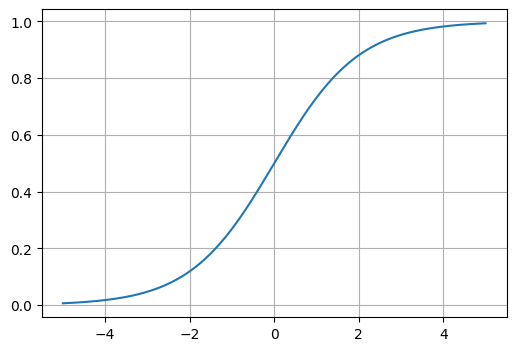

In [6]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

plot_activation_function(sigmoid)

## tanh

$$
tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

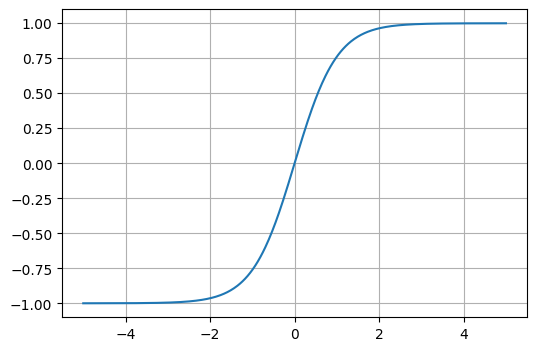

In [13]:
def tanh(x):
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

plot_activation_function(tanh)

## relu

$$
\text{ReLU}(x) = \max(0, x)
$$

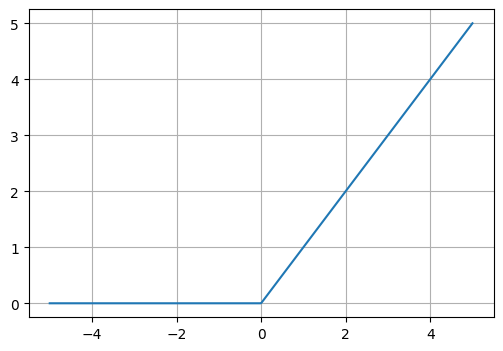

In [ ]:
def relu(x):
    return torch.maximum(torch.tensor(0.0), x)

plot_activation_function(relu)

## leaky relu

$$
\text{LeakyReLU}(x) = \max(0.01x, x)
$$

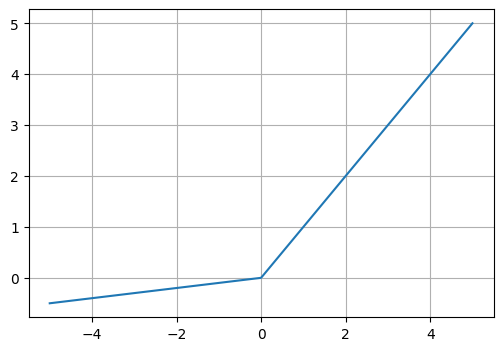

In [14]:
def leaky_relu(x, alpha=0.1):
    return torch.where(x > 0, x, alpha * x)
    # torch.where(조건, 참, 거짓)
plot_activation_function(leaky_relu)

## elu

$$
\text{ELU}(x) =
\begin{cases}
x & \text{if } x > 0 \\
\alpha (e^x - 1) & \text{if } x \leq 0
\end{cases}
$$

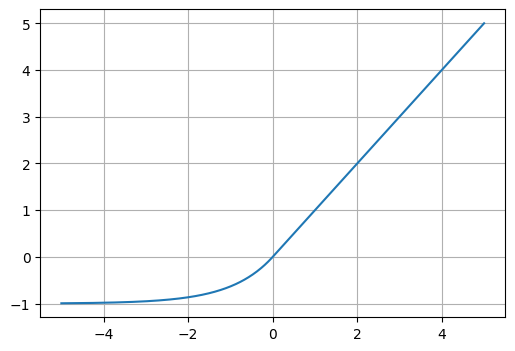

In [17]:
def elu(x, alpha=1.0):
    return torch.where(x > 0, x, alpha * (torch.exp(x) - 1))

plot_activation_function(elu)

## 자동미분

In [ ]:
# requires_grad=True로 설정된 텐서 생성
x = torch.tensor([2.0, 3.0], requires_grad=True)
x

tensor([2., 3.], requires_grad=True)

In [ ]:
# 텐서의 연산
y = x ** 2  # y = [4, 9]
z = y.sum()  # z = 13

# 역전파 수행
z.backward()

In [ ]:
# x에 대한 z의 그래디언트 (z가 x에 대해 어떻게 변화하는지를 계산, 편미분 수행)
x.grad  # 출력: tensor([4., 6.])

# z = x1^2 + x2^2
# dz/dx1 = 2 * x1 = 2 * 2 = 4
# dz/dx2 = 2 * x2 = 2 * 3 = 6

tensor([4., 6.])

- $z = x_1^2 + x_2^2$

- $x_1 = 2, \; x_2 = 3$
----

1. \( z \)를 \( x1 \)에 대해 편미분:

  $ \frac{\partial z}{\partial x_1} = 2 \times x_1 = 2 \times 2 = 4 $

2. \( z \)를 \( x2 \)에 대해 편미분:

  $ \frac{\partial z}{\partial x_2} = 2 \times x_2 = 2 \times 3 = 6 $

# 데이터 로더

In [18]:
import torch
from torch.utils.data import DataLoader, Dataset

In [19]:
# 외부 데이터 로드

from torch.utils.data import Dataset

class CustomDataset(Dataset):  # Dataset 클래스를 상속받아 새로운 데이터셋 클래스를 만듦
    def __init__(self, data, labels):
        # data: 입력 데이터
        # labels: 데이터에 대한 정답 레이블
        self.data = data
        self.labels = labels

    def __len__(self):
        # 데이터셋의 전체 크기를 반환하는 메서드
        # len(dataset)과 같은 방식으로 호출됨
        return len(self.data)

    def __getitem__(self, idx):
        # 데이터셋에서 주어진 인덱스(idx)에 해당하는 샘플을 반환하는 메서드
        # 이 메서드는 DataLoader가 배치를 생성할 때 사용됨
        x = self.data[idx]  # 인덱스에 해당하는 입력 데이터를 가져옴
        y = self.labels[idx]  # 인덱스에 해당하는 레이블을 가져옴
        return x, y  # 입력 데이터와 레이블을 튜플 형태로 반환

In [24]:
# 예시 데이터
data = torch.randn(100, 3)  # 100개의 샘플, 각 샘플은 3차원 벡터
labels = torch.randint(0, 2, (100,))  # 이진 분류를 위한 100개의 레이블

In [21]:
# data에 담긴 상위 5개 보기
data[:5]

tensor([[ 1.9269,  1.4873,  0.9007],
        [-2.1055,  0.6784, -1.2345],
        [-0.0431, -1.6047, -0.7521],
        [ 1.6487, -0.3925, -1.4036],
        [-0.7279, -0.5594, -0.7688]])

In [22]:
# labels에 담긴 상위 5개 보기
labels[:5]

tensor([0, 0, 0, 1, 1])

In [25]:
dataset = CustomDataset(data, labels)
dataset[:5]

(tensor([[ 0.6839, -1.3246, -0.5161],
         [ 0.6002, -0.4702, -0.6086],
         [-0.0462, -1.6457, -0.4833],
         [-0.7403,  0.3143,  0.1416],
         [ 1.0348, -0.6264, -0.5151]]),
 tensor([0, 1, 1, 0, 1]))

In [ ]:
print(dataset[0])
print(dataset[1])

(tensor([1.9269, 1.4873, 0.9007]), tensor(0))
(tensor([-2.1055,  0.6784, -1.2345]), tensor(0))


In [ ]:
dataloader = DataLoader(dataset, batch_size=3)
list(dataloader)[:5]

[[tensor([[ 1.9269,  1.4873,  0.9007],
          [-2.1055,  0.6784, -1.2345],
          [-0.0431, -1.6047, -0.7521]]),
  tensor([0, 0, 0])],
 [tensor([[ 1.6487, -0.3925, -1.4036],
          [-0.7279, -0.5594, -0.7688],
          [ 0.7624,  1.6423, -0.1596]]),
  tensor([1, 1, 0])],
 [tensor([[-0.4974,  0.4396, -0.7581],
          [ 1.0783,  0.8008,  1.6806],
          [ 1.2791,  1.2964,  0.6105]]),
  tensor([1, 1, 1])],
 [tensor([[ 1.3347, -0.2316,  0.0418],
          [-0.2516,  0.8599, -1.3847],
          [-0.8712, -0.2234,  1.7174]]),
  tensor([1, 0, 0])],
 [tensor([[ 0.3189, -0.4245,  0.3057],
          [-0.7746, -1.5576,  0.9956],
          [-0.8798, -0.6011, -1.2742]]),
  tensor([1, 1, 0])]]

In [26]:
# 데이터셋 및 DataLoader 생성
dataset = CustomDataset(data, labels)
dataloader = DataLoader(dataset, batch_size=3)

In [ ]:
# DataLoader에서 모든 배치를 리스트로 변환
all_batches = list(dataloader)
batch_data, batch_labels = all_batches[0] # 첫번째 배치 조회
batch_data, batch_labels

(tensor([[ 1.9269,  1.4873,  0.9007],
         [-2.1055,  0.6784, -1.2345],
         [-0.0431, -1.6047, -0.7521]]),
 tensor([0, 0, 0]))

In [ ]:
batch_data, batch_labels = all_batches[-1] # 마지막 배치 조회
batch_data, batch_labels

(tensor([[-2.1268, -0.1341, -1.0408]]), tensor([0]))

In [ ]:
dataloader = DataLoader(dataset, batch_size=7)
all_batches = list(dataloader)
batch_data, batch_labels = all_batches[-1] # 마지막 배치 조회
batch_data, batch_labels

(tensor([[-0.1882, -0.7712,  0.1799],
         [-2.1268, -0.1341, -1.0408]]),
 tensor([0, 0]))

In [ ]:
# shuffle=True: 에포크(epoch)마다 데이터가 랜덤하게 섞임, 디폴트는 False

dataloader = DataLoader(dataset, batch_size=7, shuffle=True)
all_batches = list(dataloader)
batch_data, batch_labels = all_batches[-1] # 마지막 배치 조회
batch_data, batch_labels

(tensor([[-0.9138, -0.6581,  0.0780],
         [ 0.0286,  0.6408,  0.5832]]),
 tensor([1, 0]))

In [ ]:
# drop_last=True: 전체 데이터셋을 배치로 나눌 때 마지막에 데이터가 batch_size보다 적게 남는 경우 해당 데이터를 버림, 디폴트는 False

dataloader = DataLoader(dataset, batch_size=7, shuffle=True, drop_last=True)
all_batches = list(dataloader)
batch_data, batch_labels = all_batches[-1] # 마지막 배치 조회
batch_data, batch_labels

(tensor([[-0.7150,  0.8539,  0.5130],
         [ 0.4408, -0.1483, -2.3184],
         [ 0.4788,  1.3537,  0.5261],
         [-2.1055,  0.6784, -1.2345],
         [-0.7746, -1.5576,  0.9956],
         [ 0.4626, -0.8719, -0.0271],
         [ 1.0331, -0.6867,  0.6368]]),
 tensor([0, 0, 1, 0, 1, 1, 1]))

In [28]:
# Q. 배치 사이즈 = 6, shuffle = False, drop_last = True

dataloader = DataLoader(dataset, batch_size=6, shuffle=False, drop_last=True)
all_batches = list(dataloader)
batch_data, batch_labels = all_batches[-1] # 마지막 배치 조회
batch_data, batch_labels

(tensor([[ 0.1231,  0.8758,  0.1513],
         [ 0.7394,  0.2731,  2.7312],
         [ 0.4320, -0.3092, -0.0966],
         [ 1.5419, -0.1087, -0.4189],
         [ 1.4384, -0.7068, -0.5951],
         [-0.1457, -0.3854,  0.8101]]),
 tensor([1, 0, 1, 1, 0, 1]))